In [ ]:
##pip install pandas numpy matplotlib scikit-learn

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [20]:
# Reading data from a CSV file
df = pd.read_csv('SampleData.csv')

In [21]:
# Assuming 'feature1' and 'feature2' are the columns for clustering
# Adjust column names based on your dataset
X = df[['feature1', 'feature2']]

In [22]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn

In [31]:
# Performing hierarchical clustering
# 'n_clusters' is the desired number of clusters
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = clustering.fit_predict(X_scaled)

/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [32]:
# Adding clustering results to the dataframe for visualization
df['cluster'] = clusters

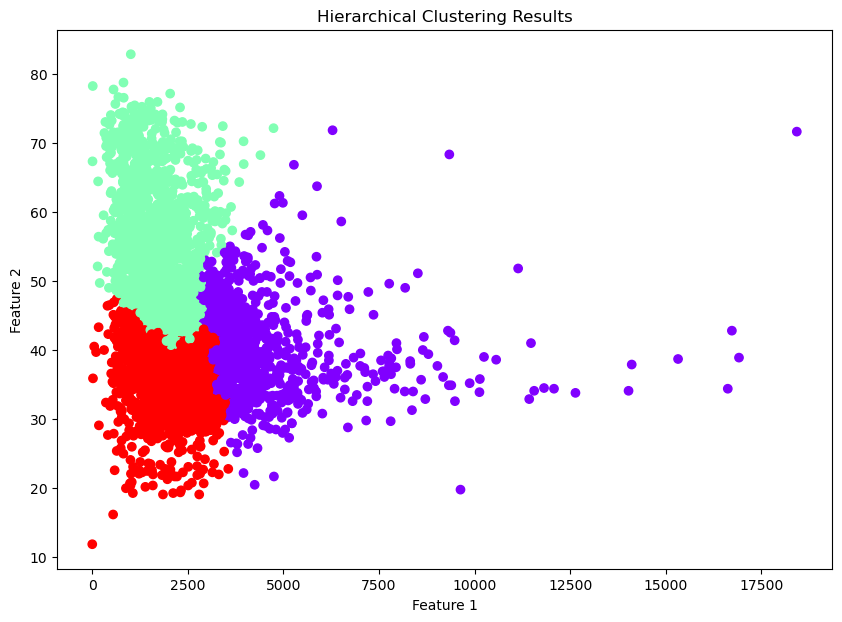

In [33]:
# Visualizing clustering results
plt.figure(figsize=(10, 7))
plt.scatter(df['feature1'], df['feature2'], c=df['cluster'], cmap='rainbow')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

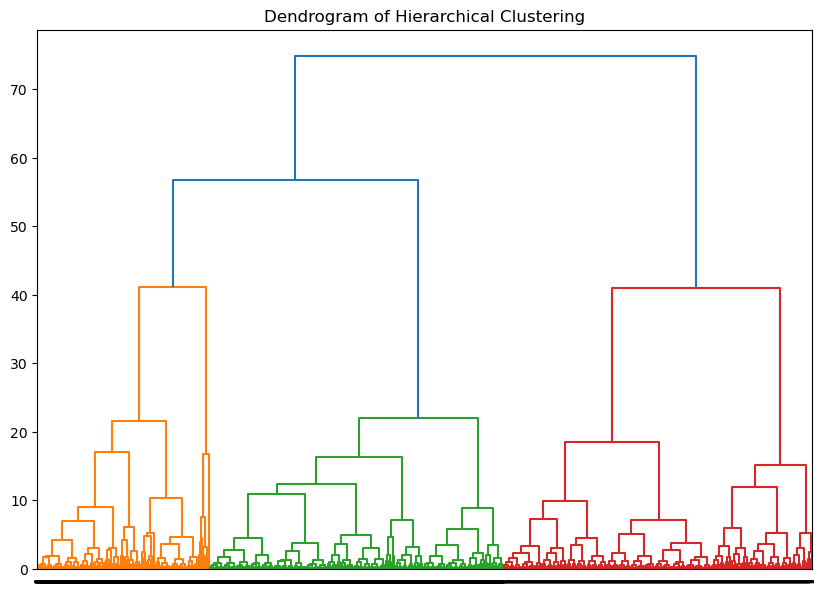

In [34]:
# Drawing a dendrogram to visualize the clustering hierarchy
# Using the 'linkage' function from scipy for hierarchical clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=clusters,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram of Hierarchical Clustering')
plt.show()